In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd
import compute_distance_matrix as cdm

In [2]:
DATA_DIR='../data'
data = pd.read_excel(f'{DATA_DIR}/fulldb.xlsx', 'Sheet 1')

In [3]:
data.head(10)

,Station,Year,Passengerdensity
0,Addison RoadAM Peak,201009,2303.7
1,Addison RoadEvening,201009,211.0
2,Addison RoadLate Night Peak,201009,5.1
3,Addison RoadMidday,201009,748.0
4,Addison RoadPM Peak,201009,399.6
5,AnacostiaAM Peak,201009,3141.0
6,AnacostiaEvening,201009,604.2
7,AnacostiaLate Night Peak,201009,20.2
8,AnacostiaMidday,201009,1860.5
9,AnacostiaPM Peak,201009,1664.0


In [4]:
df = data.groupby(['Station','Year'])['Passengerdensity'].mean().to_frame().reset_index()
stations = df['Station'].unique()
test_stations = stations[-20:]
mask = np.in1d(stations,test_stations)
training_stations = stations[np.where(~mask)]

# Create test and training data
test_data = df[df['Station'].isin(test_stations)]
train_data = df[df['Station'].isin(training_stations)]

# Print out sizes
print('Training data size: ', train_data.index.size)
print('Test data size: ', test_data.index.size)

Training data size:  27782
Test data size:  1102


In [5]:
di_matrix = cdm.extract_data(train_)

Distance matrix computation complete.
Distance matrix computation complete.


In [6]:
di_matrix

,Addison RoadAM Peak,Addison RoadEvening,Addison RoadLate Night Peak,Addison RoadMidday,Addison RoadPM Peak,AnacostiaAM Peak,AnacostiaEvening,AnacostiaLate Night Peak,AnacostiaMidday,AnacostiaPM Peak,...,West Falls ChurchAM Peak,West Falls ChurchEvening,West Falls ChurchLate Night Peak,West Falls ChurchMidday,West Falls ChurchPM Peak,West HyattsvilleAM Peak,West HyattsvilleEvening,West HyattsvilleLate Night Peak,West HyattsvilleMidday,West HyattsvillePM Peak
Addison RoadAM Peak,0,64,64,61,64,60,64,63,58,59,...,56,60,64,63,61,54,62,65,62,60
Addison RoadEvening,64,0,64,64,64,64,63,65,61,63,...,62,62,64,64,64,62,63,62,62,58
Addison RoadLate Night Peak,64,64,0,64,64,65,65,65,62,65,...,64,63,64,64,64,64,64,64,62,64
Addison RoadMidday,61,64,64,0,59,62,63,65,53,63,...,61,65,64,64,62,62,64,64,57,58
Addison RoadPM Peak,64,64,64,59,0,63,57,65,59,62,...,61,61,65,61,60,59,62,65,57,60
AnacostiaAM Peak,60,64,65,62,63,0,62,65,59,62,...,61,60,65,63,59,60,58,63,61,60
AnacostiaEvening,64,63,65,63,57,62,0,64,62,64,...,61,62,64,62,62,60,60,64,60,59
AnacostiaLate Night Peak,63,65,65,65,65,65,64,0,65,64,...,64,63,65,65,63,65,62,65,63,64
AnacostiaMidday,58,61,62,53,59,59,62,65,0,65,...,63,62,64,62,60,59,61,63,55,58
AnacostiaPM Peak,59,63,65,63,62,62,64,64,65,0,...,61,64,65,63,61,60,61,64,61,61


In [117]:
for i in [5,10,15,20,25]:
    print('Clustering with threshold ', i, '%')
    
    clustering = AgglomerativeClustering(n_clusters=int(250/i))
    clustering.fit(di_matrix)

Clustering with threshold  5 %
Clustering with threshold  10 %
Clustering with threshold  15 %
Clustering with threshold  20 %
Clustering with threshold  25 %


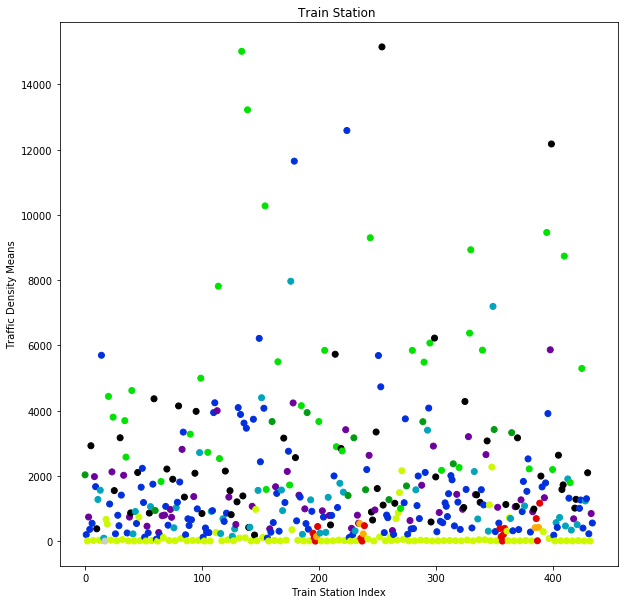

In [118]:
Y = train_data.groupby('Station')['Passengerdensity'].mean().as_matrix()
X = train_data.groupby('Station').mean().reset_index().index

plt.scatter(X,Y, c=clustering.labels_, cmap=plt.cm.spectral)
plt.title('Train Station ')
plt.xlabel('Train Station Index')
plt.ylabel('Traffic Density Means')

plt.rcParams["figure.figsize"] = [20,20]

plt.show()

In [119]:
cluster = dict()
for i in range(clustering.labels_.size):
    label = clustering.labels_[i]
    if label not in cluster:
        cluster[label] = [training_stations[i]]
    else:
        cluster[label].append(training_stations[i])

In [120]:
st_clusters = pd.DataFrame(dict([ ('Cluster ' + str(k),pd.Series(v)) for k,v in cluster.items() ])).fillna(value='').transpose()[:9]

In [121]:
st_clusters

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
Cluster 0,AnacostiaAM Peak,Archives-Navy MemorialAM Peak,Benning RoadAM Peak,BethesdaAM Peak,Braddock RoadPM Peak,BrooklandAM Peak,Capitol SouthAM Peak,Capitol SouthPM Peak,Cleveland ParkAM Peak,College Park-U of MDAM Peak,...,,,,,,,,,,
Cluster 1,Addison RoadMidday,AnacostiaMidday,BallstonMidday,BethesdaMidday,Braddock RoadMidday,Capitol HeightsMidday,CheverlyMidday,ClarendonEvening,ClarendonMidday,Cleveland ParkMidday,...,,,,,,,,,,
Cluster 2,Addison RoadEvening,Addison RoadPM Peak,AnacostiaEvening,AnacostiaPM Peak,Archives-Navy MemorialPM Peak,BallstonEvening,Benning RoadEvening,Benning RoadMidday,Benning RoadPM Peak,BethesdaEvening,...,Union StationEvening,Van Dorn StreetEvening,Van Dorn StreetPM Peak,ViennaPM Peak,WaterfrontMidday,WaterfrontPM Peak,West Falls ChurchEvening,West Falls ChurchPM Peak,West HyattsvilleEvening,West HyattsvillePM Peak
Cluster 3,Archives-Navy MemorialEvening,Archives-Navy MemorialMidday,Arlington CemeteryEvening,Branch AvenueEvening,Branch AvenueMidday,Capitol SouthEvening,College Park-U of MDEvening,College Park-U of MDMidday,Crystal CityMidday,Dunn LoringMidday,...,,,,,,,,,,
Cluster 4,Addison RoadAM Peak,CheverlyAM Peak,Fort TottenAM Peak,GreenbeltAM Peak,LandoverAM Peak,Largo Town CenterAM Peak,McPherson SquareAM Peak,Morgan Blvd.AM Peak,Naylor RoadAM Peak,New York AvePM Peak,...,,,,,,,,,,
Cluster 5,BallstonAM Peak,BallstonPM Peak,BethesdaPM Peak,Braddock RoadAM Peak,Branch AvenueAM Peak,ClarendonAM Peak,Court HouseAM Peak,Crystal CityPM Peak,Dunn LoringAM Peak,Dupont CirclePM Peak,...,,,,,,,,,,
Cluster 6,Addison RoadLate Night Peak,AnacostiaLate Night Peak,Archives-Navy MemorialLate Night Peak,Arlington CemeteryAM Peak,Arlington CemeteryMidday,Arlington CemeteryPM Peak,BallstonLate Night Peak,Benning RoadLate Night Peak,BethesdaLate Night Peak,Braddock RoadLate Night Peak,...,,,,,,,,,,
Cluster 7,GreensboroMidday,McLeanAM Peak,McLeanMidday,Tysons CornerAM Peak,Tysons CornerMidday,,,,,,...,,,,,,,,,,
Cluster 8,GreensboroAM Peak,GreensboroEvening,GreensboroLate Night Peak,GreensboroPM Peak,McLeanEvening,McLeanLate Night Peak,McLeanPM Peak,Spring HillAM Peak,Spring HillEvening,Spring HillLate Night Peak,...,,,,,,,,,,


In [122]:
st_clusters.to_excel('../Training Data Set Clusters.xlsx', 'Sheet1')

In [123]:
# Find cluster center by mean of Passenger Density
cluster_means = dict()
for index, row in st_clusters.iterrows():
    traffic = train_data[train_data['Station'].isin(row)]
    traffic['Year'] = train_data.apply(lambda row: cdm.year_format(row['Year']), axis=1)
    cluster_means[index] = traffic.groupby('Year')['Passengerdensity'].mean()
    
cdf = pd.DataFrame(cluster_means).fillna(value=0)

/home/ishaan/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


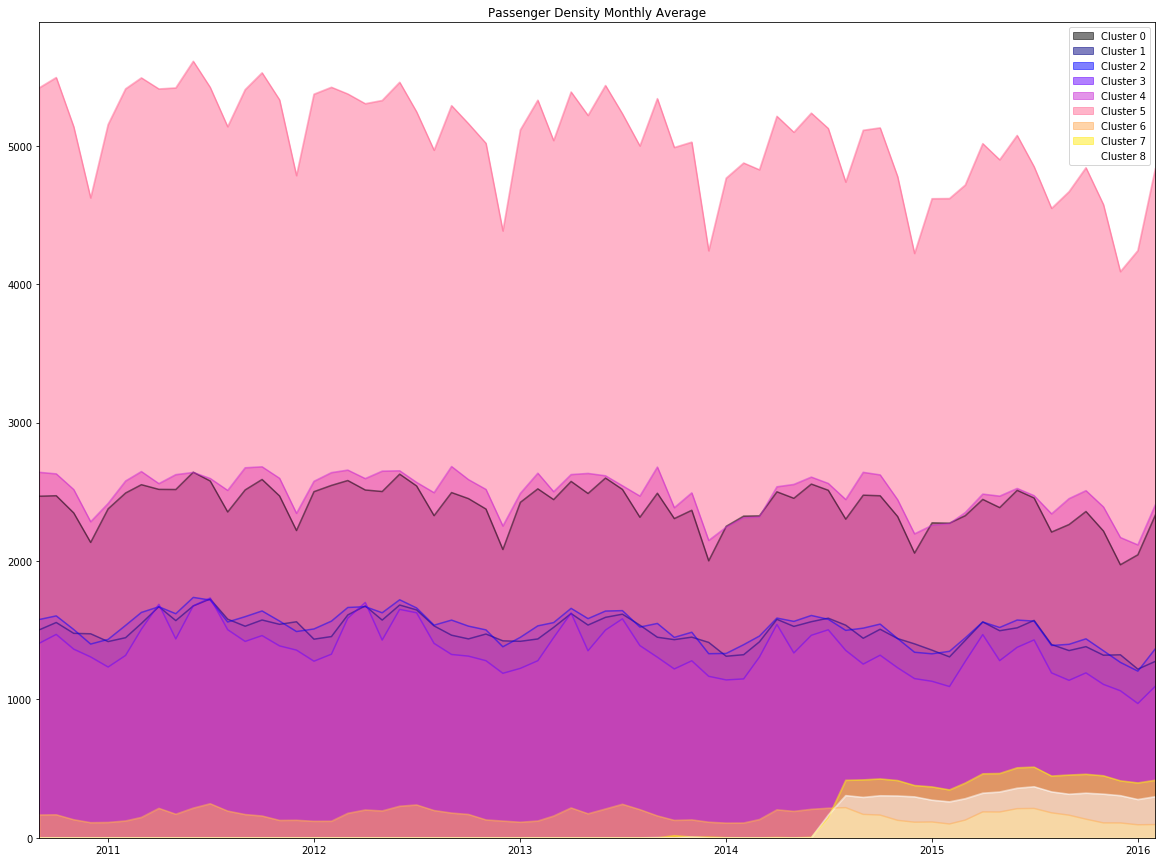

In [133]:
cdf.plot.area(stacked=False, figsize=[20,15], title='Passenger Density Monthly Average', cmap=plt.cm.gnuplot2)

In [155]:
cluster_centers = dict()

# Find cluster center by mean of Passenger Density

for index, row in st_clusters.iterrows():
    traffic = train_data[train_data['Station'].isin(row)]   
    traffic['Year'] = train_data.apply(lambda row: cdm.year_format(row['Year']), axis=1)
    cluster_centers[index] = dict()
    cluster_centers[index]['center'] = traffic['Passengerdensity'].mean()
    cluster_centers[index]['count'] = row[row != ''].size
    
cluster_centers

/home/ishaan/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Cluster 0': {'center': 2401.3208473625141, 'count': 54},
 'Cluster 1': {'center': 1491.2929189857762, 'count': 49},
 'Cluster 2': {'center': 1518.8066741798145, 'count': 121},
 'Cluster 3': {'center': 1353.1218188227001, 'count': 43},
 'Cluster 4': {'center': 2496.0496503496497, 'count': 13},
 'Cluster 5': {'center': 5048.9620015948967, 'count': 38},
 'Cluster 6': {'center': 160.35850694444446, 'count': 96},
 'Cluster 7': {'center': 346.00666666666672, 'count': 5},
 'Cluster 8': {'center': 293.6340909090909, 'count': 15}}

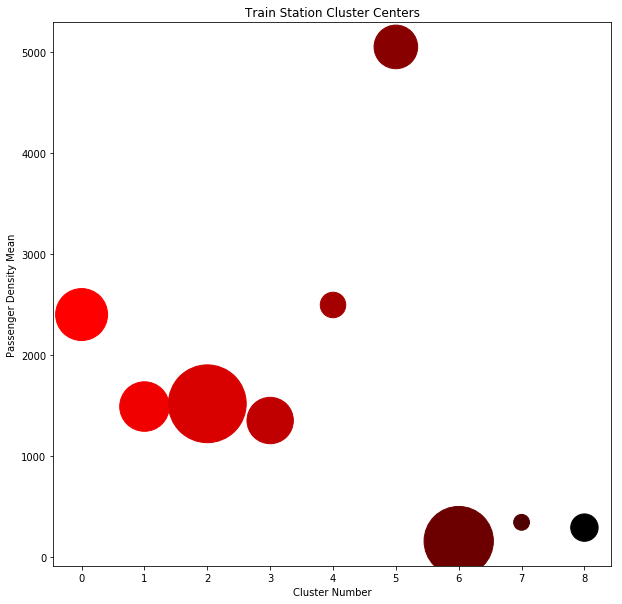

In [172]:
# plot cluster centers
data_points = pd.DataFrame(cluster_centers).T.reset_index()

Y = data_points['center'].values
X = range(data_points.index.size)

plt.scatter(X,Y, s=data_points['count']*50, c=X, cmap=plt.cm.flag)
plt.title('Train Station Cluster Centers')
plt.xlabel('Cluster Number')
plt.ylabel('Passenger Density Mean')

plt.rcParams["figure.figsize"] = [10,10]
plt.show()

In [189]:
# Predict clusters for test data
predict_labels = clustering.fit_predict(test_di_matrix)
list(predict_labels)

[6, 1, 8, 0, 1, 6, 2, 5, 2, 6, 3, 3, 3, 3, 3, 9, 0, 7, 4, 4]

In [158]:
pred_cluster = dict()
for i in range(predict_labels.size):
    label = predict_labels[i]
    if label not in pred_cluster:
        pred_cluster[label] = [test_stations[i]]
    else:
        pred_cluster[label].append(test_stations[i])

In [159]:
print('Predicted Clusters:\n')
for k, v in pred_cluster.items():
    if v:
        for station in v:
            print(str(station) + "  =>  " + str(k))

Predicted Clusters:

WheatonAM Peak  =>  6
White FlintAM Peak  =>  6
White FlintPM Peak  =>  6
WheatonEvening  =>  1
WheatonPM Peak  =>  1
WheatonLate Night Peak  =>  8
WheatonMidday  =>  0
Woodley Park-ZooEvening  =>  0
White FlintEvening  =>  2
White FlintMidday  =>  2
White FlintLate Night Peak  =>  5
WiehleAM Peak  =>  3
WiehleEvening  =>  3
WiehleLate Night Peak  =>  3
WiehleMidday  =>  3
WiehlePM Peak  =>  3
Woodley Park-ZooAM Peak  =>  9
Woodley Park-ZooLate Night Peak  =>  7
Woodley Park-ZooMidday  =>  4
Woodley Park-ZooPM Peak  =>  4


In [188]:
# Calculate accuracy of clustering
test_x = test_data.groupby('Station')['Passengerdensity'].mean()
centers = data_points['center'].values

min_labels = list()

for index, x in test_x.items():
    distances = abs(centers - x)
    label_x = np.where(distances == distances.min())[0][0]
    min_labels.append(label_x)
    
print('Station Labels according to distance:')
min_labels

Station Labels according to distance:


[0, 7, 6, 3, 7, 2, 8, 6, 7, 3, 5, 7, 6, 3, 3, 4, 3, 6, 2, 2]

In [192]:
from sklearn.metrics import mean_absolute_error
y_true = min_labels
y_pred = list(predict_labels)

print(y_true)
print(y_pred)

mean_absolute_error(y_true, y_pred)

[0, 7, 6, 3, 7, 2, 8, 6, 7, 3, 5, 7, 6, 3, 3, 4, 3, 6, 2, 2]
[6, 1, 8, 0, 1, 6, 2, 5, 2, 6, 3, 3, 3, 3, 3, 9, 0, 7, 4, 4]


3.2000000000000002